# Классификация экзопланет

*Экзопланета* (внесолнечная планета) — планета, находящаяся вне Солнечной системы.

## Постановка задачи
Внесолнечные планеты (extrasolar planets) можно разделить по классам:
1. Планета, вращающаяся по орбите вокруг одиночной звезды
2. Планета, вращающаяся по орбите S-типа вокруг двойной звезды
3. Планета, вращающаяся по орбите P-типа вокруг двойной звезды
4. Планета-сирота (межзвездная планета) - объект, являющийся по сути планетой, но не привязанный гравитационно ни к какой звезде.

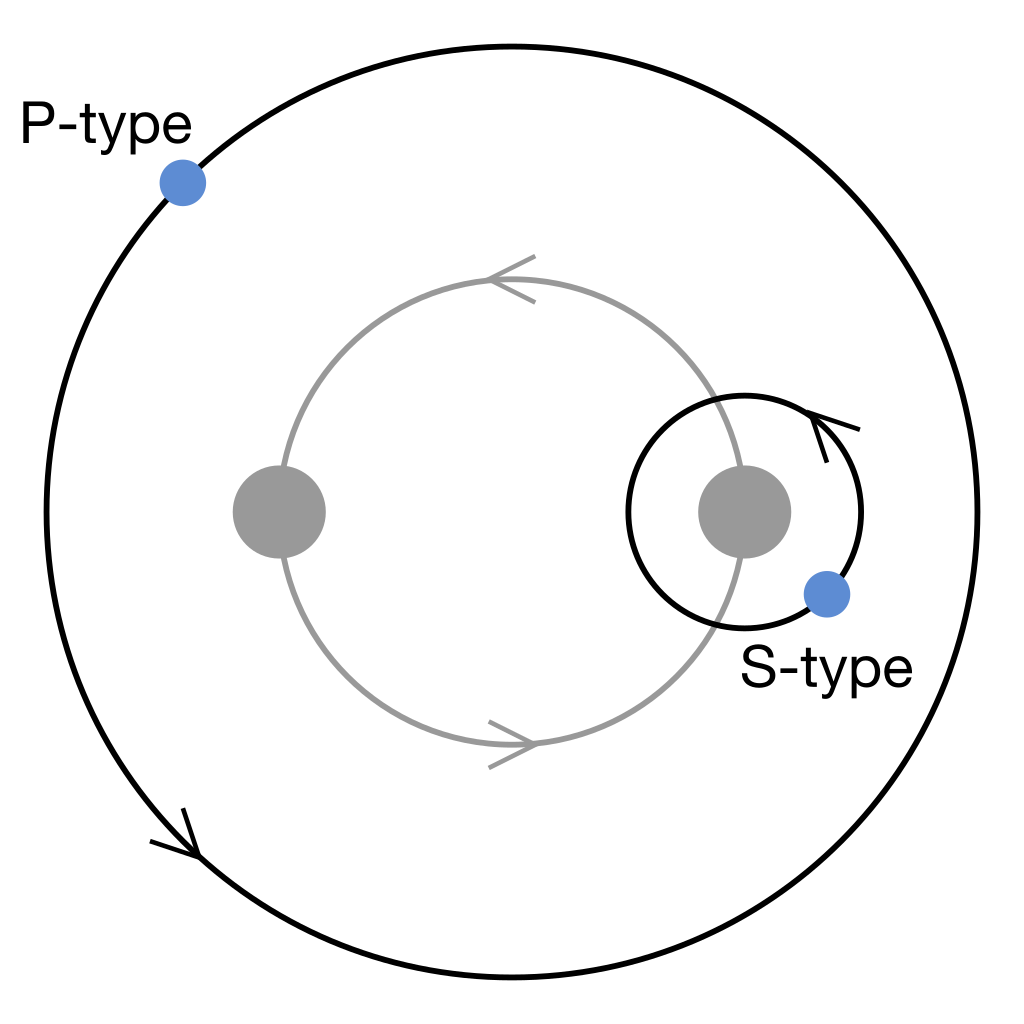

Будем решать задачу в рамках данной выше классификации (по характеристикам небесного тела отнесем его к одному из четырех классов)

## Работа с данными

Возьмем открытый датасет с характеристиками экзопланет.
Ссылка на датасет: https://www.kaggle.com/mrisdal/open-exoplanet-catalogue

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Прочитаем данные.

In [2]:
data = pd.read_csv("oec.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlanetIdentifier      3584 non-null   object 
 1   TypeFlag              3584 non-null   int64  
 2   PlanetaryMassJpt      1313 non-null   float64
 3   RadiusJpt             2774 non-null   float64
 4   PeriodDays            3485 non-null   float64
 5   SemiMajorAxisAU       1406 non-null   float64
 6   Eccentricity          1108 non-null   float64
 7   PeriastronDeg         328 non-null    float64
 8   LongitudeDeg          43 non-null     float64
 9   AscendingNodeDeg      46 non-null     float64
 10  InclinationDeg        665 non-null    float64
 11  SurfaceTempK          741 non-null    float64
 12  AgeGyr                2 non-null      float64
 13  DiscoveryMethod       3521 non-null   object 
 14  DiscoveryYear         3574 non-null   float64
 15  LastUpdated          

Разберемся с признаками.
1. `PlanetIdentifier` - название небесного тела.
2. `TypeFlag` - тип планеты (0=планета, вращающаяся вокруг одной звезды; 1=планета с орбитой P-типа; 2=планета с орбитой S-типа; 3=планета-сирота).
3. `PlanetaryMassJpt` - масса планеты (в массах Юпитера).
4. `RadiusJpt` - радиус планеты (в радиусах Юпитера).
5. `PeriodDays` - период обращения (в днях).


Кеплеровы элементы орбиты (6 элементов):

6. `SemiMajorAxisAU` - большая полуось (в астрономических единицах).
7. `Eccentricity` - эксцентриситет орбиты.
8. `PeriastronDeg` - аргумент перицентра (в градусах).
9. `LongitudeDeg` - долгота (в градусах).
10. `AscendingNodeDeg` - узел орбиты (в градусах).
11. `InclinationDeg` - наклонение (в градусах).


12. `SurfaceTempK` - температура поверхности планеты (в кельвинах).
13. `AgeGyr` - возраст планеты (млрд. лет).
14. `DiscoveryMethod` - метод обнаружения.
15. `DiscoveryYear` - год обнаружения.
16. `LastUpdated` - дата последнего обновления.
17. `RightAscension` - прямое восхождение (в часовой мере) +/-hh mm ss. 
18. `Declination` - склонение (в часовой мере) hh mm ss.
19. `DistFromSunParsec` - расстояние от Солнца (в парсеках).
20. `HostStarMassSlrMass` - масса "хозяйской" звезды (в массах Солнца).
21. `HostStarRadiusSlrRad` - радиус "хозяйской" звезды (в радиусах Солнца).
22. `HostStarMetallicity` - металличность "хозяйской" звезды.
23. `HostStarTempK` - температура "хозяйской" звезды (в кельвинах).
24. `HostStarAgeGyr` - возраст "хозяйской" звезды (млрд. лет).
25. `ListsPlanetIsOn` - список, в который включена планета

### Предобработка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlanetIdentifier      3584 non-null   object 
 1   TypeFlag              3584 non-null   int64  
 2   PlanetaryMassJpt      1313 non-null   float64
 3   RadiusJpt             2774 non-null   float64
 4   PeriodDays            3485 non-null   float64
 5   SemiMajorAxisAU       1406 non-null   float64
 6   Eccentricity          1108 non-null   float64
 7   PeriastronDeg         328 non-null    float64
 8   LongitudeDeg          43 non-null     float64
 9   AscendingNodeDeg      46 non-null     float64
 10  InclinationDeg        665 non-null    float64
 11  SurfaceTempK          741 non-null    float64
 12  AgeGyr                2 non-null      float64
 13  DiscoveryMethod       3521 non-null   object 
 14  DiscoveryYear         3574 non-null   float64
 15  LastUpdated          

Удалим столбцы, в которых более половины значений пропущено. Также удалим столбцы `LastUpdated`и `PlanetIdentifier`, т.к. они не несут никакой полезной информации.

In [4]:
data = data.drop(['PlanetaryMassJpt','SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg', 'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK', 
                 'AgeGyr', 'HostStarAgeGyr', 'LastUpdated', 'PlanetIdentifier'], axis=1)

Заполним столбцы `RadiusJpt`,`PeriodDays`, `DistFromSunParsec`, `HostStarMetallicity`, `HostStarMassSlrMass`, `HostStarRadiusSlrRad` и `HostStarTempK` медианой.

In [5]:
def fillmedian(names_cols: list):
    for name in names_cols:
        data[name] = data[name].fillna(data[name].median())
fillmedian(['RadiusJpt', 'PeriodDays', 'DistFromSunParsec', 'HostStarMetallicity', 'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarTempK'])

In [6]:
data['DiscoveryMethod'].value_counts()

transit         2712
RV               692
imaging           52
microlensing      40
timing            25
Name: DiscoveryMethod, dtype: int64

Чаще всего используется транзитный метод обнаружения. Заполним им пропуски в столбце `DiscoveryMethod`

In [7]:
data['DiscoveryMethod'] = data['DiscoveryMethod'].fillna('transit')

Аналогично поступим с `DiscoveryYear`

In [8]:
data['DiscoveryYear'].value_counts()

2016.0    1415
2014.0     928
2015.0     199
2011.0     189
2013.0     140
2012.0     131
2010.0     120
2009.0      81
2008.0      66
2007.0      64
2005.0      34
2006.0      30
2002.0      30
2004.0      30
2017.0      27
2003.0      25
2000.0      20
2001.0      13
1999.0      11
1996.0       6
1998.0       5
1992.0       4
1995.0       1
1930.0       1
1997.0       1
1846.0       1
1994.0       1
1781.0       1
Name: DiscoveryYear, dtype: int64

In [9]:
data['DiscoveryYear'] = data['DiscoveryYear'].fillna(2016.0)

In [10]:
data['RightAscension']

0             16 01 03
1             16 01 03
2          19 00 03.14
3          19 00 03.14
4          19 00 03.14
             ...      
3579    01 08 35.39148
3580    01 08 35.39148
3581          12 30 26
3582          12 30 26
3583          19 22 33
Name: RightAscension, Length: 3584, dtype: object

In [11]:
data['Declination'] 

0            +33 18 13
1            +33 18 13
2          +40 13 14.7
3          +40 13 14.7
4          +40 13 14.7
             ...      
3579    -10 10 56.1570
3580    -10 10 56.1570
3581         +22 52 47
3582         +22 52 47
3583         +48 59 46
Name: Declination, Length: 3584, dtype: object

Есть два столбца `RightAscension` и `Declination` типа *object* (строка). Они содержат данные, заданные в часовой мере. Переведем их в радианы.

In [12]:
def todegree(s: str):
    if pd.notna(s):
        ans = 0
        k = 1
        l = 3600
        if s[0] == '-':
            k = -1
        for elem in list(map(float, s.split())):
            ans += elem * l
            l //= 60
        return k * math.pi / 43200 * ans
    
    return s

data['RightAscension'] = data['RightAscension'].apply(todegree)
data['Declination'] = data['Declination'].apply(todegree)
    
    
    

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TypeFlag              3584 non-null   int64  
 1   RadiusJpt             3584 non-null   float64
 2   PeriodDays            3584 non-null   float64
 3   DiscoveryMethod       3584 non-null   object 
 4   DiscoveryYear         3584 non-null   float64
 5   RightAscension        3574 non-null   float64
 6   Declination           3574 non-null   float64
 7   DistFromSunParsec     3584 non-null   float64
 8   HostStarMassSlrMass   3584 non-null   float64
 9   HostStarRadiusSlrRad  3584 non-null   float64
 10  HostStarMetallicity   3584 non-null   float64
 11  HostStarTempK         3584 non-null   float64
 12  ListsPlanetIsOn       3584 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 364.1+ KB


Посмотрим в каких строках остались пропуски.

In [14]:
data[data['RightAscension'].isna()]

,TypeFlag,RadiusJpt,PeriodDays,DiscoveryMethod,DiscoveryYear,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,ListsPlanetIsOn
408,0,0.034902,87.9700,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
409,0,0.086565,224.7000,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
410,0,0.091130,365.2422,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
411,0,0.048489,686.9800,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
412,0,1.000000,4332.8200,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
413,0,0.832944,10755.6700,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
414,0,0.362775,30687.1530,transit,1781.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
415,0,0.352219,60190.0300,transit,1846.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
416,0,0.016438,90553.0200,transit,1930.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
995,0,1.200000,3.3000,transit,2011.0,NaN,NaN,333.0,0.977,1.0,2.000000e-02,5700.0,Confirmed planets


In [15]:
data[data['Declination'].isna()]

,TypeFlag,RadiusJpt,PeriodDays,DiscoveryMethod,DiscoveryYear,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,ListsPlanetIsOn
408,0,0.034902,87.9700,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
409,0,0.086565,224.7000,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
410,0,0.091130,365.2422,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
411,0,0.048489,686.9800,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
412,0,1.000000,4332.8200,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
413,0,0.832944,10755.6700,transit,2016.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
414,0,0.362775,30687.1530,transit,1781.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
415,0,0.352219,60190.0300,transit,1846.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
416,0,0.016438,90553.0200,transit,1930.0,NaN,NaN,333.0,1.000,1.0,1.000000e-08,5778.0,Solar System
995,0,1.200000,3.3000,transit,2011.0,NaN,NaN,333.0,0.977,1.0,2.000000e-02,5700.0,Confirmed planets


Интересно то, что пропуски оказались в строках с планетами Солнечной системы и одной из планет WASP-53. Пока оставим этот вопрос и заполним пропуски нулями.

In [16]:
data['Declination'] = data['Declination'].fillna(0)
data['RightAscension'] = data['RightAscension'].fillna(0)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TypeFlag              3584 non-null   int64  
 1   RadiusJpt             3584 non-null   float64
 2   PeriodDays            3584 non-null   float64
 3   DiscoveryMethod       3584 non-null   object 
 4   DiscoveryYear         3584 non-null   float64
 5   RightAscension        3584 non-null   float64
 6   Declination           3584 non-null   float64
 7   DistFromSunParsec     3584 non-null   float64
 8   HostStarMassSlrMass   3584 non-null   float64
 9   HostStarRadiusSlrRad  3584 non-null   float64
 10  HostStarMetallicity   3584 non-null   float64
 11  HostStarTempK         3584 non-null   float64
 12  ListsPlanetIsOn       3584 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 364.1+ KB


Работа с пропусками заверщена.

### Категориальные признаки

Имеется два категориальных признака - `DiscoveryMethod` и `ListsPlanetIsOn`. Посмотрим на их структуру.

In [20]:
data['ListsPlanetIsOn'].unique()

array(['Confirmed planets', 'Controversial',
       'Confirmed planets, Planets in binary systems, S-type',
       'Controversial, Planets in binary systems, S-type',
       'Confirmed planets, Planets in binary systems, P-type',
       'Controversial, Planets in binary systems, P-type', 'Solar System',
       'Confirmed planets, Planets in open clusters',
       'Confirmed planets, Orphan planets', 'Retracted planet candidate',
       'Confirmed planets, Planets in binary systems, P-type, Planets in globular clusters',
       'Planets in binary systems, S-type, Confirmed planets',
       'Kepler Objects of Interest'], dtype=object)

Столбец `ListsPlanetIsOn` непостредственно содержит признак, который мы собираемся предсказывать (словесная форма с некоторыми дополнениями столбца `TypeFlag`. Поэтому удалим его.

In [22]:
data = data.drop('ListsPlanetIsOn', axis=1)

Теперь посмотрим на столбец `DiscoveryMethod`

In [23]:
data['DiscoveryMethod'].unique()

array(['RV', 'transit', 'microlensing', 'imaging', 'timing'], dtype=object)

Используем *One-Hot Encoding*, чтобы обработать этот столбец.

In [26]:
pd.get_dummies(data)

,TypeFlag,RadiusJpt,PeriodDays,DiscoveryYear,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,DiscoveryMethod_RV,DiscoveryMethod_imaging,DiscoveryMethod_microlensing,DiscoveryMethod_timing,DiscoveryMethod_transit
0,0,0.2096,39.845800,2016.0,4.193372,8.718865,17.236,0.889,1.362,-0.31,5627.0,1,0,0,0,0
1,0,0.2096,102.540000,2016.0,4.193372,8.718865,17.236,0.889,1.362,-0.31,5627.0,1,0,0,0,0
2,0,0.0540,0.176891,2012.0,4.974417,10.529768,333.000,0.460,0.450,0.00,3584.0,0,0,0,0,1
3,0,0.1140,4.194525,2016.0,4.974417,10.529768,333.000,0.460,0.450,0.00,3584.0,0,0,0,0,1
4,0,0.0710,6.356006,2016.0,4.974417,10.529768,333.000,0.460,0.450,0.00,3584.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,0,0.2096,407.300000,2014.0,0.299280,2.570277,37.990,1.700,14.300,0.12,4528.0,1,0,0,0,0
3580,0,0.2096,744.300000,2014.0,0.299280,2.570277,37.990,1.700,14.300,0.12,4528.0,1,0,0,0,0
3581,0,0.2096,395.400000,2003.0,3.274383,5.989897,68.500,1.000,1.220,0.14,5407.0,1,0,0,0,0
3582,0,0.2096,1605.800000,2005.0,3.274383,5.989897,68.500,1.000,1.220,0.14,5407.0,1,0,0,0,0


### Визуализация данных и вычисление характеристик

Проверим корреляцию столбцов

In [27]:
data.corr()

,TypeFlag,RadiusJpt,PeriodDays,DiscoveryYear,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK
TypeFlag,1.000000,0.059762,0.100420,-0.152768,-0.145948,-0.122727,-0.084542,0.020262,0.041417,0.030627,-0.007808
RadiusJpt,0.059762,1.000000,0.002780,-0.058108,-0.184083,-0.170921,0.020433,0.199792,-0.008747,0.081811,0.121828
PeriodDays,0.100420,0.002780,1.000000,-0.187536,-0.024034,-0.063685,-0.028929,0.082905,0.006878,-0.029667,0.069858
DiscoveryYear,-0.152768,-0.058108,-0.187536,1.000000,0.289601,0.210635,0.041826,-0.077677,-0.066379,-0.064103,-0.009869
RightAscension,-0.145948,-0.184083,-0.024034,0.289601,1.000000,0.337498,0.183662,-0.114411,-0.158029,0.018024,0.054232
Declination,-0.122727,-0.170921,-0.063685,0.210635,0.337498,1.000000,0.036620,-0.019489,-0.051984,-0.024238,0.080142
DistFromSunParsec,-0.084542,0.020433,-0.028929,0.041826,0.183662,0.036620,1.000000,-0.107637,-0.054388,0.012156,0.089772
HostStarMassSlrMass,0.020262,0.199792,0.082905,-0.077677,-0.114411,-0.019489,-0.107637,1.000000,0.392496,0.147669,0.317047
HostStarRadiusSlrRad,0.041417,-0.008747,0.006878,-0.066379,-0.158029,-0.051984,-0.054388,0.392496,1.000000,-0.116323,-0.070830
HostStarMetallicity,0.030627,0.081811,-0.029667,-0.064103,0.018024,-0.024238,0.012156,0.147669,-0.116323,1.000000,0.065470


Наблюдается слабая корреляция пар столбцов `HostStarMassSlrMass` и `HostStarRadiusSlrRad`, `RightAscension` и `Declination`. Чем больше радиус звезды, тем больше её масса. 

Посмотрим на основные характеристики

In [28]:
data.describe()

,TypeFlag,RadiusJpt,PeriodDays,DiscoveryYear,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK
count,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000
mean,0.097656,0.334670,522.769106,2013.308036,4.426984,10.197199,465.070043,0.982933,1.451238,0.017359,5510.139118
std,0.424554,0.372913,7405.684620,6.152720,1.393294,3.742529,662.813464,0.311496,2.933908,0.161895,1182.636414
min,0.000000,0.002300,0.090706,1781.000000,0.000000,-0.237520,1.295000,0.012000,0.000014,-2.090000,540.000000
25%,0.000000,0.158000,4.900976,2013.000000,4.677282,9.972484,226.825000,0.840000,0.830000,-0.010000,5147.000000
50%,0.000000,0.209600,13.071630,2014.000000,5.036766,11.191269,333.000000,0.977000,1.000000,0.020000,5634.000000
75%,0.000000,0.266325,47.038187,2016.000000,5.133377,12.295481,456.672500,1.100000,1.220000,0.060000,5938.000000
max,3.000000,6.000000,320000.000000,2017.000000,6.282749,22.445677,8500.000000,4.500000,51.100000,0.560000,29300.000000


## Подготовка обучающей и тестовой выборки

to do